# Part 3 Task 1
https://github.com/josStorer/RWKV-Runner/blob/master/README_ZH.md

# World 系列

In [1]:
# 下面这个文件名你可以在 https://huggingface.co/BlinkDL/rwkv-7-world 里确认
# !wget -O models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth
# !wget -O models/RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth
# !wget -O models/RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth
# !wget -O models/RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth \
#   https://huggingface.co/BlinkDL/rwkv-7-world/resolve/main/RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth

# 正式开始构建这个Pipeline

## 设置路径

In [2]:
# Connect to Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
# TODO: Set Your Own Dir toward the "DSGA1011 NLP Final Project"
base_dir = os.path.join('drive', 'MyDrive', 'DSGA1011 NLP Final Project')

In [4]:
# the working dir
working_dir = os.path.join(base_dir, 'RWKV API processing')

# Check whether the file exist, if not, raise error
if not os.path.exists(working_dir):
  raise Exception('The working dir does not exist')
else:
  # Print the file under it
  sub_files = os.listdir(working_dir)
  # add /n to subfiles
  sub_files = "\n".join(sub_files)
  file_info = f"The existing files under {working_dir} are: \n{sub_files}"
  print(file_info)

The existing files under drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing are: 
models
RWKV-Runner
data
outputs
rwkv_env
requirements.txt
Layerwise Visualization.ipynb
RWKV 模型加载.py
层级激活提取与分析.py
Token 级归因分析.py
端到端管道与 RWKV 集成.py
Download_g1.ipynb
api.log.2 (1)
api.log.1 (1)
outputs_quality
api.log.2
api.log.1
api.log.3
Copy of Tryrunner_for_RACE.ipynb
RWKV-Runner-decouple
Tryrunner_hidden_decouple.ipynb
api.log
server.log
Tryrunner_hidden.ipynb


In [5]:
# Set to working dir
os.chdir(working_dir)

In [6]:
!ls

 api.log			     outputs_quality
 api.log.1			     requirements.txt
'api.log.1 (1)'			     rwkv_env
 api.log.2			     RWKV-Runner
'api.log.2 (1)'			     RWKV-Runner-decouple
 api.log.3			    'RWKV 模型加载.py'
'Copy of Tryrunner_for_RACE.ipynb'   server.log
 data				    'Token 级归因分析.py'
 Download_g1.ipynb		     Tryrunner_hidden_decouple.ipynb
'Layerwise Visualization.ipynb'      Tryrunner_hidden.ipynb
 models				     层级激活提取与分析.py
 outputs			    '端到端管道与 RWKV 集成.py'


## Initalize and test

In [7]:
# 重设python环境（请选择1）
!update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.10 1
!update-alternatives --config python3

There are 2 choices for the alternative python3 (providing /usr/bin/python3).

  Selection    Path                 Priority   Status
------------------------------------------------------------
* 0            /usr/bin/python3.12   2         auto mode
  1            /usr/bin/python3.10   1         manual mode
  2            /usr/bin/python3.12   2         manual mode

Press <enter> to keep the current choice[*], or type selection number: 1
update-alternatives: using /usr/bin/python3.10 to provide /usr/bin/python3 (python3) in manual mode


In [8]:
# 重新安装pip
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 33.4 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 61.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pip]


In [9]:
!/usr/bin/python3.10 -m pip install -r RWKV-Runner/backend-python/requirements.txt

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 894.6/894.6 kB 24.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 62.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 105.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 48.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 131.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 105.0 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 103.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 106.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.6/30.6 MB 150.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
!/usr/bin/python3.10 -m pip install ninja

In [11]:
# Star url
!fuser -k 8000/tcp || true
!/usr/bin/python3.10 RWKV-Runner/backend-python/main.py --host 0.0.0.0 --port 8000 > server.log 2>&1 &
# !/usr/bin/python3.10 RWKV-Runner/backend-python/main.py --host 0.0.0.0 --port 8000 2>&1 | tee server.log

In [12]:
# API doc
from google.colab import output
docs_url = output.eval_js("google.colab.kernel.proxyPort(8000)") + "/docs"
print("Docs URL:", docs_url)


Docs URL: https://8000-gpu-t4-hm-3iidbchx86pdb-c.us-east1-0.prod.colab.dev/docs


In [13]:
# # Enable cache
import requests
!/usr/bin/python3.10 -m pip install cyac==1.9
cache_enable_resp = requests.post("http://127.0.0.1:8000/enable-state-cache")
print(cache_enable_resp.status_code, cache_enable_resp.text)
# 200 "success"

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for cyac: filename=cyac-1.9-cp310-cp310-linux_x86_64.whl size=1038224 sha256=de8168d70cffa07340e33bca359f2cecdf6e696c21a1fb8104be3ae2b4779853
  Stored in directory: /root/.cache/pip/wheels/40/ae/45/9076427b28cf92fb626c2246994afd3aacec5e0c0ce060de1a
Successfully built cyac
200 "success"


In [14]:
# Import
import requests
import json
import time
import re
from tqdm import tqdm

In [15]:
# Test
switch_body = {
    "model": "models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth",
    "strategy": "cuda fp16",
    "tokenizer": "",
    "customCuda": True,
    "deploy": False
}
r = requests.post("http://127.0.0.1:8000/switch-model", json=switch_body)
print(r.status_code, r.text)
# 200 "success"

200 "success"


## Basic Functions

In [16]:
# Reset memory
def reset_context():
  """Clear server-side conversation memory/state."""
  try:
    resp_reset = requests.post("http://127.0.0.1:8000/forget")
    if resp_reset.status_code != 200:
      resp_reset = requests.post("http://127.0.0.1:8000/reset-state")
      if resp_reset.status_code != 200:
        print(f"[reset_context] Warning: failed to reset context!{resp_reset.text}")
        return

      # print(json.dumps(resp_reset.json(), indent=2))
  except Exception:
    print("[reset_context] Warning: failed to reset context!")

def bulid_chat_body(
  content_list: list,
  model="rwkv",
  max_tokens=128,
  temperature=0.7
    ):

  chat_body = {
    "model": model,
    "messages": [
      {
        "role": "user",
        "content":"\n\n".join(content_list),
        "raw": False
      }
    ],
    "stream": False,
    "max_tokens": max_tokens,
    "temperature": temperature
  }
  return chat_body

def parse_choice_letter(text: str):
  if not text: return None
  split_str = text.strip().splitlines()
  if not split_str: return None
  first = split_str[0]
  m = re.search(r"\b([ABCD])\b", first, flags=re.I)
  return m.group(1).upper() if m else None

# def get_response(chat_body, chat_mode = "chat/completions"):
#   r = requests.post(f"http://127.0.0.1:8000/{chat_mode}", json=chat_body)
#   return r.json()["choices"][0]["message"]["content"]

## QuALITY Dataset


In [17]:
train_QuALITY_path = os.path.join("data", "QuALITY",'QuALITY.v1.0.1.htmlstripped.train')
dev_QuALITY_path = os.path.join("data", "QuALITY",'QuALITY.v1.0.1.htmlstripped.dev')

In [18]:
# Json_iter
def jsonl_iter(path):
  with open(path, "r", encoding="utf-8") as f:
    for i, line in enumerate(f, 1):
      line = line.strip()
      if not line:
        continue
      try:
        yield json.loads(line)
      except Exception as e:
        print(f"[WARN] line {i} parse error: {e}")

def count_lines(path):
  with open(path, "r", encoding="utf-8") as f:
    return sum(1 for _ in f)

# Get iterable value
QuALITY_iter = jsonl_iter(dev_QuALITY_path)
# Peek first record
first = next(QuALITY_iter)
second = next(QuALITY_iter)
print(type(first), list(first.keys()))
# Common keys you may see:
# ['article_id','title','source','year','license','article','questions', ...]

print(f"Totally {count_lines(dev_QuALITY_path)} examples")

<class 'dict'> ['article_id', 'set_unique_id', 'batch_num', 'writer_id', 'source', 'title', 'year', 'author', 'topic', 'article', 'questions', 'url', 'license']
Totally 230 examples


In [19]:
def get_question(record, index):
  max_question_index = len(record["questions"]) - 1
  if index < 0 or index > max_question_index:
    raise ValueError(f"index {index} out of range [0, {max_question_index}]")
  return record["questions"][index]

def get_question_str(question):
  opts = question["options"]
  return "\n".join([
      "Question:",
      question["question"],
      "Options:",
      f"A: {opts[0]}",
      f"B: {opts[1]}",
      f"C: {opts[2]}",
      f"D: {opts[3]}",
  ])

def get_gold(question):
  """
  Try common keys and handle 1-based or 0-based or letter formats.
  """
  CHOICE = ["A","B","C","D"]
  k = "gold_label"
  v = question[k]
  return CHOICE[v-1]
  # if k in q and q[k] is not None:
  #   v = q[k]
  #   if isinstance(v, int):
  #     # 1-based -> 0-based
  #     return CHOICE[v-1]
  # return None

# Print minimal meta + article length
def print_meta(record):
  print("article_id:", record.get("article_id"))
  print("set_unique_id:", record.get("set_unique_id"))
  print("batch_num:", record.get("batch_num"))
  print("writer_id:", record.get("writer_id"))
  print("source:", record.get("source"))
  print("title:", record.get("title"))
  print("year:", record.get("year"))
  print("author:", record.get("author"))
  print("topic:", record.get("topic"))
  print("article_length_chars:", len(record.get("article","")))
  print("num_questions:", len(record.get("questions", [])))

  # Show the first question (with options)
  q0 = get_question(record, 0)
  print(get_question_str(q0))
  print(f"gold={get_gold(q0)}")

  # Sometimes there is a 'difficult' flag per question (HARD subset indicator)
  print("difficult(HARD?) =", q0.get("difficult"))

print_meta(first)
# print_meta(next(QuALITY_iter))

model_dict = {
    "World 0.1B": "RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth",
    "World 0.4B": "RWKV-x070-World-0.4B-v2.9-20250107-ctx4096.pth",
    "World 1.5B": "RWKV-x070-World-1.5B-v3-20250127-ctx4096.pth",
    "World 2.9B": "RWKV-x070-World-2.9B-v3-20250211-ctx4096.pth",

    # --- Pile 系列 ---
    "Pile 1.47B": "RWKV-x070-Pile-1.47B-20241210-ctx4096.pth",
    "Pile 421M": "RWKV-x070-Pile-421M-20241127-ctx4096.pth",
    "Pile 168M": "RWKV-x070-Pile-168M-20241120-ctx4096.pth",
    "Pile 165M L25-D576": "RWKV-x070-Pile-165M-L25-D576-20241218-ctx4096.pth",
    "Pile 164M L33-D512": "RWKV-x070-Pile-164M-L33-D512-20241218-ctx4096.pth",

    # # --- g1 系列 ---
    # "g1 0.1B": "rwkv7-g1-0.1b-20250307-ctx4096.pth",
    # "g1 0.4B": "rwkv7-g1-0.4b-20250324-ctx4096.pth",
    # "g1 1.5B": "rwkv7-g1-1.5b-20250429-ctx4096.pth",
    # "g1 2.9B": "rwkv7-g1-2.9b-20250520-ctx4096.pth",
}

def switch_model(version="World 0.1B"):
  model_name = model_dict[version]

  swich_body = {
    "model": f"models/{model_name}",
    "strategy": "cuda fp16",
    "tokenizer": "",
    "customCuda": True,
    "deploy": False
  }

  r = requests.post("http://127.0.0.1:8000/switch-model", json=swich_body)
  if r.status_code != 200:
    print(f"[switch_model] Warning: failed to switch model: {r.text}")
  else:
    print(f"Success: switched to {version}")
    # print(json.dumps(r.json(), indent=2))
  # 200 "success"

article_id: 52845
set_unique_id: 52845_75VB1ISR
batch_num: 11
writer_id: 1001
source: Gutenberg
title: The Girl in His Mind
year: 1950
author: Young, Robert F.
topic: Guilt -- Fiction; Science fiction; PS; Psychological fiction
article_length_chars: 28515
num_questions: 6
Question:
How much time has passed between Blake's night with Eldoria and his search for Sabrina York in his mind-world?
Options:
A: 7 years
B: 10 hours
C: 12 years
D: 1 hour
gold=B
difficult(HARD?) = 0


In [20]:
reset_context()

In [21]:
switch_model("World 0.1B")

Success: switched to World 0.1B


In [22]:
start_time = time.time()
charater_setting = "You are a careful reasoner. I will provide you with a MC question and a long passage to read\n"
rule_setting = (
        "Return ONLY one letter from {A,B,C,D} on the FIRST line. "
        "Do not copy the options. Do not add any extra words."
    )
example_question = (
    f"\nExample:"
    f"\nPassage:\n {first['article'][:1000]}"
    f"\n{get_question_str(get_question(first, 0))}"
    f"\nAnswer: {get_gold(get_question(first, 0))}"
)

cur_question = (
    f"\nPassage:\n {second['article']}"
    f"\n{get_question_str(get_question(second, 0))}"
    f"\nAnswer:"
)

test_body = bulid_chat_body([charater_setting, rule_setting, example_question, cur_question], max_tokens=2, temperature=0.0)
r = requests.post("http://127.0.0.1:8000/chat/completions", json=test_body)
# print(r.status_code)
result = parse_choice_letter(r.json()["choices"][0]["message"]["content"])
gold = get_gold(get_question(second, 0))
print(f"Raw Output:{r.json()['choices'][0]['message']['content']}")
print(f"PRED: {result}, GOLD: {gold}")

end_time = time.time()
print(f"Total time: {end_time - start_time}s")

Raw Output:
The
PRED: None, GOLD: B
Total time: 0.8919250965118408s


In [23]:
body = {
    "model": "RWKV",
    "messages": [
        {"role": "user", "content": "hello world"}
    ]
}

r = requests.post("http://127.0.0.1:8000/v1/chat/completions", json=body)
print(r.json())


{'object': 'chat.completion', 'model': 'RWKV-x070-World-0.1B-v2.8-20241210-ctx4096', 'choices': [{'message': {'role': 'assistant', 'content': " Hello! I'm a computer language model, and I'm here to assist you with your questions. What do you want me to do?"}, 'index': 0, 'finish_reason': 'stop'}], 'usage': {'prompt_tokens': 8, 'completion_tokens': 30, 'total_tokens': 38}}


In [24]:
import os, sys

# 1. 把 backend-python 加到 sys.path（不是 rwkv_pip 这一层）
sys.path.insert(0, "/content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/RWKV-Runner/backend-python")

# 2. 打开 RWKV7 模式（让 RWKV 这个类内部用 RWKV_x070）
os.environ["RWKV_V7_ON"] = "1"

# 3. 用包名导入，而不是 from model import ...
from rwkv_pip.model import RWKV
from rwkv_pip.rwkv_tokenizer import TRIE_TOKENIZER


/usr/local/lib/python3.12/dist-packages/torch/backends/__init__.py:46: UserWarning: Please use the new API settings to control TF32 behavior, such as torch.backends.cudnn.conv.fp32_precision = 'tf32' or torch.backends.cuda.matmul.fp32_precision = 'ieee'. Old settings, e.g, torch.backends.cuda.matmul.allow_tf32 = True, torch.backends.cudnn.allow_tf32 = True, allowTF32CuDNN() and allowTF32CuBLAS() will be deprecated after Pytorch 2.9. Please see https://pytorch.org/docs/main/notes/cuda.html#tensorfloat-32-tf32-on-ampere-and-later-devices (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:80.)
  self.setter(val)



### RWKV-7 "Goose" enabled ###



In [25]:
model_path = "/content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth"
model = RWKV(model_path, strategy="cuda fp16")   # 这里就会内部创建 RWKV_x070 实例

vocab_path = "/content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/RWKV-Runner/backend-python/rwkv_pip/rwkv_vocab_v20230424.txt"
tokenizer = TRIE_TOKENIZER(vocab_path)


Loading /content/drive/MyDrive/DSGA1011 NLP Final Project/RWKV API processing/models/RWKV-x070-World-0.1B-v2.8-20241210-ctx4096.pth (cuda fp16)



In [26]:
ids = tokenizer.encode("hello world")   # 注意：这里要是 list[int]

logits, state = model.forward(ids, None, full_output=True)
# 不要再 model.forward_seq(ids, None)



In [27]:
logits, state = model.forward(ids, None, full_output=True)
hidden_layers = model.hidden_to_log   # list of length = n_layer


In [28]:
print(hidden_layers[1])

tensor([[-0.0169, -0.0404,  0.2009,  ...,  0.0380,  0.1099, -0.3523],
        [ 0.0343,  0.0626, -0.0632,  ...,  0.0066, -0.0388,  0.0304]],
       dtype=torch.float16)


# Stage 1: 层级激活分布分析

In [29]:
import numpy as np
from scipy import stats
from scipy.spatial.distance import jensenshannon
from scipy.stats import wasserstein_distance
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple
import json
from tqdm.auto import tqdm
import torch

# 设置绘图样式
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✓ 库导入完成")


✓ 库导入完成


In [30]:
# ========================================
# 修复版：比较后半部分或整体统计
# ========================================

class LayerAnalyzer:
    """分析短文本 vs 长文本的层级激活分布"""

    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def extract_hidden_states(self, text: str) -> List[torch.Tensor]:
        """提取所有层的 hidden states（深拷贝）"""
        ids = self.tokenizer.encode(text)

        with torch.no_grad():
            logits, state = self.model.forward(ids, None, full_output=True)
            hidden_layers = self.model.hidden_to_log

        hidden_layers_copy = []
        for layer_hidden in hidden_layers:
            h = layer_hidden.clone().detach()
            # 如果是 [D]，统一扩一维成 [1, D]
            if h.dim() == 1:
                h = h.unsqueeze(0)
            hidden_layers_copy.append(h)

        return hidden_layers_copy

    def compute_distribution_metrics(self,
                                    short_hidden: torch.Tensor,
                                    long_hidden: torch.Tensor) -> Dict[str, float]:
        """
        计算两个激活分布的差异指标

        ⚠️ 关键修复：
        1. 如果长文本以短文本开头，只比较长文本的后半部分
        2. 或者使用全局统计量（均值、方差等）而不是逐点比较
        """

        short_np = short_hidden.cpu().to(torch.float32).numpy()  # [seq_short, hidden_dim]
        long_np = long_hidden.cpu().to(torch.float32).numpy()    # [seq_long, hidden_dim]

        metrics = {}

        # ===== 策略 1: 比较后半部分 =====
        # 如果长文本更长，只取长文本后半段（独有的部分）
        seq_short = short_np.shape[0]
        seq_long = long_np.shape[0]

        if seq_long > seq_short:
            # 只取长文本中短文本之后的部分
            long_unique = long_np[seq_short:, :]  # 从短文本长度后开始
            print(f"    短全部: shape={short_np.shape}, mean={short_np.mean():.6f}")
            print(f"    长独有部分: shape={long_unique.shape}, mean={long_unique.mean():.6f}")

            # 展平
            short_flat = short_np.flatten()
            long_flat = long_unique.flatten()  # ← 只用独有部分
        else:
            short_flat = short_np.flatten()
            long_flat = long_np.flatten()

        # ===== 策略 2: 比较序列级统计量 =====
        # 计算每个序列位置的统计量，然后比较这些统计量的分布
        short_pos_means = short_np.mean(axis=1)  # [seq_short]
        long_pos_means = long_np.mean(axis=1)    # [seq_long]

        metrics['seq_mean_diff'] = abs(short_pos_means.mean() - long_pos_means.mean())
        metrics['seq_std_diff'] = abs(short_pos_means.std() - long_pos_means.std())

        # 采样
        sample_size = min(5000, len(short_flat), len(long_flat))

        if len(short_flat) <= sample_size:
            short_sample = short_flat
            long_sample = long_flat
        else:
            np.random.seed(42)
            short_sample = np.random.choice(short_flat, sample_size, replace=False)
            long_sample = np.random.choice(long_flat, sample_size, replace=False)

        # 计算分布距离
        try:
            metrics['wasserstein'] = wasserstein_distance(short_sample, long_sample)
        except:
            metrics['wasserstein'] = 0.0

        try:
            ks_stat, ks_pval = stats.ks_2samp(short_sample, long_sample)
            metrics['ks_statistic'] = ks_stat
            metrics['ks_pvalue'] = ks_pval
        except:
            metrics['ks_statistic'] = 0.0
            metrics['ks_pvalue'] = 1.0

        # JS 散度
        try:
            all_data = np.concatenate([short_sample, long_sample])
            bins = np.linspace(all_data.min(), all_data.max(), 50)

            short_hist, _ = np.histogram(short_sample, bins=bins, density=True)
            long_hist, _ = np.histogram(long_sample, bins=bins, density=True)

            short_hist = (short_hist + 1e-10) / (short_hist.sum() + 1e-10)
            long_hist = (long_hist + 1e-10) / (long_hist.sum() + 1e-10)

            metrics['js_divergence'] = jensenshannon(short_hist, long_hist)
        except:
            metrics['js_divergence'] = 0.0

        # 其他指标
        threshold = 0.1
        metrics['sparsity_short'] = (np.abs(short_flat) > threshold).mean()
        metrics['sparsity_long'] = (np.abs(long_flat) > threshold).mean()
        metrics['sparsity_diff'] = metrics['sparsity_long'] - metrics['sparsity_short']
        metrics['mean_diff'] = abs(long_flat.mean() - short_flat.mean())
        metrics['std_diff'] = abs(long_flat.std() - short_flat.std())

        print(f"    → W={metrics['wasserstein']:.6f}, JSD={metrics['js_divergence']:.6f}, "
              f"seq_mean_diff={metrics['seq_mean_diff']:.6f}")

        return metrics

# 重新创建分析器
analyzer = LayerAnalyzer(model, tokenizer)
print("✓ 分析器已更新（比较长文本独有部分）")

✓ 分析器已更新（比较长文本独有部分）


In [31]:
# ========================================
# 快速诊断：单样本测试
# ========================================

print("【快速诊断】单个文本对测试")
print("="*70)

# 使用简单的测试文本
test_short = "hello"
test_long  = "hello, this is a much longer sentence used to test the activation distribution of the model."  * 5

print(f"短文本: '{test_short}'")
print(f"长文本: '{test_long[:50]}...'")
print()

# 提取隐藏状态
print("提取隐藏状态...")
short_h = analyzer.extract_hidden_states(test_short)
long_h = analyzer.extract_hidden_states(test_long)

print(f"\n✓ 成功提取")
print(f"  短: {len(short_h)} 层, 第0层形状: {short_h[0].shape}")
print(f"  长: {len(long_h)} 层, 第0层形状: {long_h[0].shape}")

# 测试计算指标
print("\n计算第0层指标...")
layer_0_metrics = analyzer.compute_distribution_metrics(short_h[0], long_h[0])

print("\n最终指标:")
for key, val in layer_0_metrics.items():
    print(f"  {key}: {val:.6f}" if isinstance(val, float) else f"  {key}: {val}")

【快速诊断】单个文本对测试
短文本: 'hello'
长文本: 'hello, this is a much longer sentence used to test...'

提取隐藏状态...

✓ 成功提取
  短: 12 层, 第0层形状: torch.Size([1, 768])
  长: 12 层, 第0层形状: torch.Size([90, 768])

计算第0层指标...
    短全部: shape=(1, 768), mean=-0.001289
    长独有部分: shape=(89, 768), mean=-0.000629
    → W=0.032825, JSD=0.159738, seq_mean_diff=0.000653

最终指标:
  seq_mean_diff: 0.0006534502608701587
  seq_std_diff: 0.0015826465096324682
  wasserstein: 0.032825
  ks_statistic: 0.115959
  ks_pvalue: 0.000000
  js_divergence: 0.159738
  sparsity_short: 0.276042
  sparsity_long: 0.144517
  sparsity_diff: -0.131525
  mean_diff: 0.0006608119583688676
  std_diff: 0.014332190155982971


In [32]:
import pandas as pd

short_h = analyzer.extract_hidden_states(test_short)
long_h  = analyzer.extract_hidden_states(test_long)

all_metrics = []
num_layers = len(short_h)

for L in range(num_layers):
    m = analyzer.compute_distribution_metrics(short_h[L], long_h[L])
    m["layer"] = L
    all_metrics.append(m)

df = pd.DataFrame(all_metrics)
df


    短全部: shape=(1, 768), mean=-0.001289
    长独有部分: shape=(89, 768), mean=-0.000629
    → W=0.032825, JSD=0.159738, seq_mean_diff=0.000653
    短全部: shape=(1, 768), mean=-0.007555
    长独有部分: shape=(89, 768), mean=-0.002874
    → W=0.043955, JSD=0.116344, seq_mean_diff=0.004630
    短全部: shape=(1, 768), mean=-0.023144
    长独有部分: shape=(89, 768), mean=-0.005220
    → W=0.110887, JSD=0.208842, seq_mean_diff=0.017725
    短全部: shape=(1, 768), mean=-0.023367
    长独有部分: shape=(89, 768), mean=-0.007590
    → W=0.076610, JSD=0.113971, seq_mean_diff=0.015601
    短全部: shape=(1, 768), mean=-0.024443
    长独有部分: shape=(89, 768), mean=-0.011456
    → W=0.057238, JSD=0.072881, seq_mean_diff=0.012842
    短全部: shape=(1, 768), mean=-0.032606
    长独有部分: shape=(89, 768), mean=-0.014822
    → W=0.101550, JSD=0.068371, seq_mean_diff=0.017587
    短全部: shape=(1, 768), mean=-0.032397
    长独有部分: shape=(89, 768), mean=-0.017930
    → W=0.243743, JSD=0.182751, seq_mean_diff=0.014306
    短全部: shape=(1, 768), mean=-0.0

,seq_mean_diff,seq_std_diff,wasserstein,ks_statistic,ks_pvalue,js_divergence,sparsity_short,sparsity_long,sparsity_diff,mean_diff,std_diff,layer
0,0.000653,0.001583,0.032825,0.115959,2.391114e-09,0.159738,0.276042,0.144517,-0.131525,0.000661,0.014332,0
1,0.004630,0.002549,0.043955,0.133910,2.490353e-12,0.116344,0.389323,0.208377,-0.180946,0.004682,0.073808,1
2,0.017725,0.003563,0.110887,0.173835,1.578292e-20,0.208842,0.628906,0.400895,-0.228011,0.017924,0.292811,2
3,0.015601,0.004560,0.076610,0.107385,4.468429e-08,0.113971,0.648438,0.559296,-0.089142,0.015776,0.213959,3
4,0.012842,0.006123,0.057238,0.083831,4.343114e-05,0.072881,0.647135,0.695020,0.047884,0.012986,0.098700,4
5,0.017587,0.007598,0.101550,0.074438,4.197785e-04,0.068371,0.764323,0.787599,0.023277,0.017784,0.297065,5
6,0.014306,0.009829,0.243743,0.151481,1.136719e-15,0.182751,0.768229,0.856361,0.088132,0.014466,0.063375,6
7,0.011916,0.013063,0.393989,0.201969,1.283610e-27,0.261152,0.785156,0.892498,0.107341,0.012050,0.197021,7
8,0.028980,0.016954,0.746242,0.268888,5.946807e-49,0.290134,0.795573,0.931297,0.135724,0.029306,1.026239,8
9,0.063176,0.026977,0.273207,0.052142,3.111623e-02,0.098741,0.949219,0.948955,-0.000263,0.063886,1.088911,9


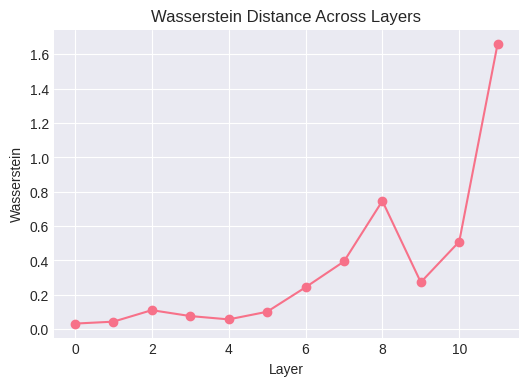

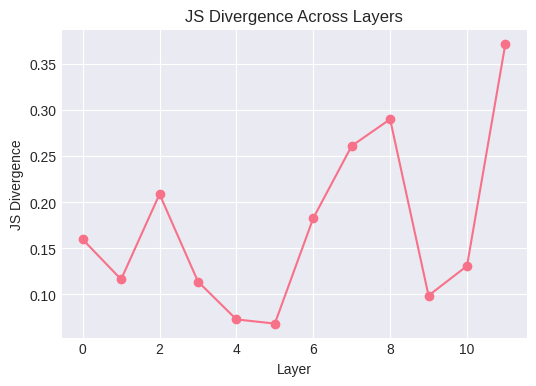

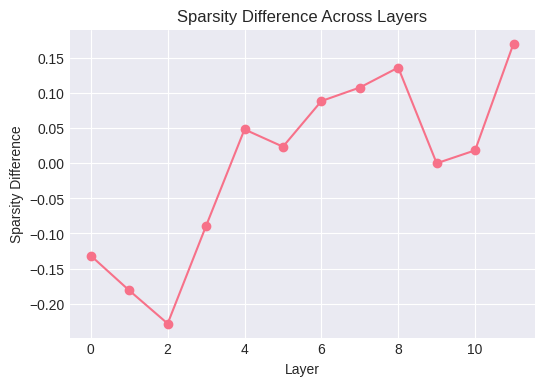

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(df["layer"], df["wasserstein"], marker="o")
plt.title("Wasserstein Distance Across Layers")
plt.xlabel("Layer")
plt.ylabel("Wasserstein")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df["layer"], df["js_divergence"], marker="o")
plt.title("JS Divergence Across Layers")
plt.xlabel("Layer")
xlabel = "Layer"
plt.ylabel("JS Divergence")
plt.grid(True)
plt.show()

plt.figure(figsize=(6,4))
plt.plot(df["layer"], df["sparsity_diff"], marker="o")
plt.title("Sparsity Difference Across Layers")
plt.xlabel("Layer")
plt.ylabel("Sparsity Difference")
plt.grid(True)
plt.show()


In [41]:
import pandas as pd

def compute_metrics_for_pair(analyzer: LayerAnalyzer,
                             short_text: str,
                             long_text: str,
                             example_id: int) -> pd.DataFrame:
    """
    对单个 short–long 文本对，计算所有层的分布差异指标。
    返回一个 DataFrame，包含所有 layer 的指标，并带 example_id。
    """
    print(f"\n========== Example {example_id} ==========")
    print(f"短: {short_text[:60]}...")
    print(f"长: {long_text[:60]}...")

    # 提取所有层隐藏状态
    short_h = analyzer.extract_hidden_states(short_text)
    long_h  = analyzer.extract_hidden_states(long_text)

    num_layers = len(short_h)
    all_metrics = []

    for L in range(num_layers):
        print(f"\n[Ex {example_id}] 计算第 {L} 层指标...")
        m = analyzer.compute_distribution_metrics(short_h[L], long_h[L])
        m["layer"] = L
        m["example_id"] = example_id
        all_metrics.append(m)

    df = pd.DataFrame(all_metrics)
    return df


In [45]:
import matplotlib.pyplot as plt

def plot_metric_across_layers_multi_examples(
    df_all: pd.DataFrame,
    metric: str,
    title: str = None
):
    """
    在一张图上画出多个 example 的某个 metric 随 layer 变化的曲线。

    df_all: 包含列 ['layer', 'example_id', metric]
    metric: 'wasserstein' / 'js_divergence' / 'sparsity_diff' 等
    """
    if title is None:
        title = f"{metric} Across Layers (Multiple Examples)"

    layers = sorted(df_all["layer"].unique())
    example_ids = sorted(df_all["example_id"].unique())

    plt.figure(figsize=(6, 4))
    for eid in example_ids:
        sub = df_all[df_all["example_id"] == eid]
        # 按 layer 排序，保证线条是顺的
        sub = sub.sort_values("layer")
        plt.plot(sub["layer"], sub[metric], marker="o", label=f"Ex {eid}", alpha=0.7)

    plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel(metric)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [46]:
# ========================================
# N = 5 个 short–long 文本对
# ========================================

examples = [
    (
        "The weather is nice today.",
        "The weather is nice today, and many people are going outside to enjoy the sunshine, walk in the park, and spend time with their friends and family."
    ),
    (
        "Neural networks can approximate functions.",
        "Neural networks can approximate functions with a large number of parameters, and in practice they are trained using gradient-based optimization algorithms on large datasets."
    ),
    (
        "Transformers use self-attention.",
        "Transformers use self-attention to capture long-range dependencies, and have become the foundation of many state-of-the-art models in natural language processing and beyond."
    ),
    (
        "Recurrent models process sequences step by step.",
        "Recurrent models process sequences step by step, maintaining a hidden state that summarizes past information, but they may suffer from vanishing or exploding gradients when dealing with very long sequences."
    ),
    (
        "Long contexts can change model behavior.",
        "Long contexts can change model behavior in subtle ways, affecting which tokens are attended to, how information is integrated across layers, and potentially leading to different activation patterns compared to short contexts."
    ),
]

# ========================================
# 对 5 个 example 逐个跑 metric
# ========================================

all_dfs = []
for i, (short_text, long_text) in enumerate(examples, start=1):
    df_i = compute_metrics_for_pair(analyzer, short_text, long_text, example_id=i)
    all_dfs.append(df_i)

df_all_examples = pd.concat(all_dfs, ignore_index=True)

print("\n✓ 所有 example 的 metrics 已计算完成")
display(df_all_examples.head())



========== Example 1 ==========
短: The weather is nice today....
长: The weather is nice today, and many people are going outside...

[Ex 1] 计算第 0 层指标...
    短全部: shape=(6, 768), mean=-0.001051
    长独有部分: shape=(25, 768), mean=-0.000195
    → W=0.005858, JSD=0.043823, seq_mean_diff=0.000728

[Ex 1] 计算第 1 层指标...
    短全部: shape=(6, 768), mean=-0.003566
    长独有部分: shape=(25, 768), mean=-0.001224
    → W=0.011829, JSD=0.043857, seq_mean_diff=0.001931

[Ex 1] 计算第 2 层指标...
    短全部: shape=(6, 768), mean=-0.007924
    长独有部分: shape=(25, 768), mean=-0.002680
    → W=0.025646, JSD=0.058123, seq_mean_diff=0.004275

[Ex 1] 计算第 3 层指标...
    短全部: shape=(6, 768), mean=-0.009070
    长独有部分: shape=(25, 768), mean=-0.003263
    → W=0.018940, JSD=0.044400, seq_mean_diff=0.004644

[Ex 1] 计算第 4 层指标...
    短全部: shape=(6, 768), mean=-0.010445
    长独有部分: shape=(25, 768), mean=-0.005671
    → W=0.013042, JSD=0.027546, seq_mean_diff=0.003773

[Ex 1] 计算第 5 层指标...
    短全部: shape=(6, 768), mean=-0.013600
    长独有部分: 

,seq_mean_diff,seq_std_diff,wasserstein,ks_statistic,ks_pvalue,js_divergence,sparsity_short,sparsity_long,sparsity_diff,mean_diff,std_diff,layer,example_id
0,0.000728,0.000351,0.005858,0.025304,1.686183e-02,0.043823,0.166233,0.141094,-0.025139,0.000856,0.001647,0,1
1,0.001931,0.000430,0.011829,0.039852,1.451222e-05,0.043857,0.238281,0.189531,-0.048750,0.002343,0.026642,1,1
2,0.004275,0.003060,0.025646,0.055764,1.744631e-10,0.058123,0.460720,0.387448,-0.073273,0.005245,0.097693,2,1
3,0.004644,0.002791,0.018940,0.034714,2.516050e-04,0.044400,0.580946,0.545833,-0.035113,0.005807,0.065228,3,1
4,0.003773,0.002982,0.013042,0.014453,4.155253e-01,0.027546,0.695312,0.695521,0.000208,0.004774,0.028273,4,1


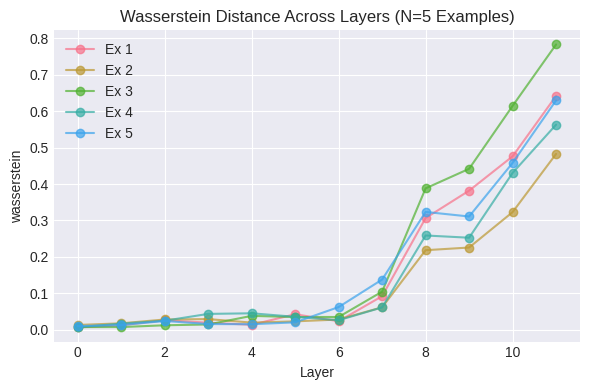

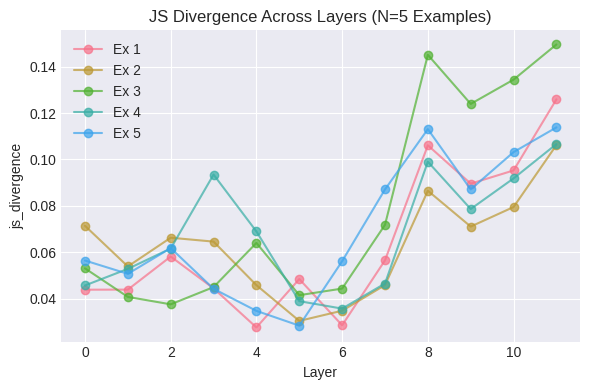

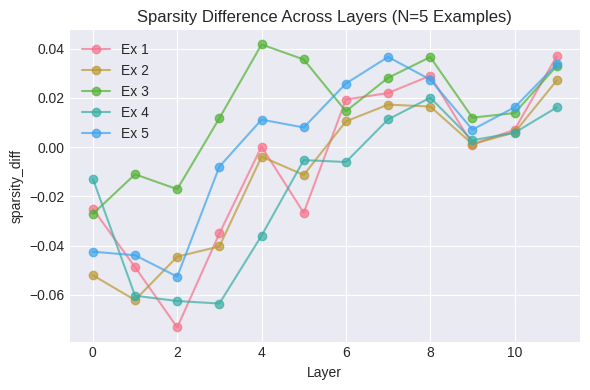

In [47]:
# 画 Wasserstein 多条线
plot_metric_across_layers_multi_examples(
    df_all_examples,
    metric="wasserstein",
    title="Wasserstein Distance Across Layers (N=5 Examples)"
)

# 画 JS Divergence 多条线
plot_metric_across_layers_multi_examples(
    df_all_examples,
    metric="js_divergence",
    title="JS Divergence Across Layers (N=5 Examples)"
)

# 画 Sparsity Difference 多条线（如果你觉得这一维也有意义）
plot_metric_across_layers_multi_examples(
    df_all_examples,
    metric="sparsity_diff",
    title="Sparsity Difference Across Layers (N=5 Examples)"
)


## 100 examples

In [54]:
import json
import random

random.seed(42)

topics = [
    "neural networks",
    "large language models",
    "sequence length",
    "attention mechanisms",
    "context windows",
    "long document reasoning",
    "activation distributions",
    "hidden states",
    "memory in recurrent models",
    "tokenization choices",
    "training stability",
    "gradient flow",
    "representation learning",
    "prompt engineering",
    "instruction tuning",
    "model calibration",
    "zero shot generalization",
    "few shot learning",
    "evaluation benchmarks",
    "dataset bias"
]

settings = [
    "a simple toy task",
    "a real world application",
    "a small academic dataset",
    "a large web scale corpus",
    "an interactive dialogue setting",
    "a document classification task",
    "a question answering benchmark",
    "a summarization task",
    "a code generation scenario",
    "an open ended generation task"
]

goals = [
    "understand how short and long inputs change the model behaviour",
    "compare shallow and deep layers in the network",
    "inspect which layers are most sensitive to context length",
    "analyze how information is propagated through layers",
    "study whether long contexts introduce distribution shift",
    "measure how activations evolve as depth increases",
    "identify layers that behave like content filters",
    "see whether the model forgets early tokens in long inputs",
    "understand which layers react strongly to global semantics",
    "evaluate whether the model remains stable for long sequences"
]

extra_clauses = [
    "The analysis focuses on per layer statistics and compares short inputs to longer variants.",
    "Researchers collect activations from all layers and study the resulting distributions.",
    "The study reports several metrics, including Wasserstein distance and JS divergence.",
    "This helps reveal which layers are most affected by increasing context length.",
    "The experiment is designed to highlight subtle differences between short and long prompts.",
    "By tracking the distributions across depth, the team can see consistent patterns.",
    "The results provide intuition about how the model allocates its capacity.",
    "The setup mirrors how models are often used in practical long context scenarios.",
    "The findings are later summarized with confidence intervals over many examples.",
    "These observations guide future work on length robustness and model design."
]

examples_data = []

for i in range(1, 101):
    topic    = random.choice(topics)
    setting_ = random.choice(settings)
    goal     = random.choice(goals)
    extra    = random.choice(extra_clauses)

    short = (
        f"This example discusses {topic} in {setting_} "
        f"to {goal}."
    )
    long = short + " " + extra

    examples_data.append({
        "id": i,
        "short": long.split(" ", maxsplit=18)[0:18]  # 可选：保证 short 不太长
    })

# 上面那行有点复杂，我们简化：重新构造 short / long，更清晰：
examples_data = []
for i in range(1, 101):
    topic    = random.choice(topics)
    setting_ = random.choice(settings)
    goal     = random.choice(goals)
    extra    = random.choice(extra_clauses)

    short = (
        f"This example discusses {topic} in {setting_} "
        f"to {goal}."
    )
    long = short + " " + extra

    examples_data.append({
        "id": i,
        "short": short,
        "long": long
    })

# 写入 json 文件
json_path = "short_long_examples.json"
with open(json_path, "w", encoding="utf-8") as f:
    json.dump(examples_data, f, ensure_ascii=False, indent=2)

print(f"✓ Saved {len(examples_data)} examples to {json_path}")
print("Example preview:")
print(examples_data[0]["short"])
print(examples_data[0]["long"])


✓ Saved 100 examples to short_long_examples.json
Example preview:
This example discusses context windows in a large web scale corpus to inspect which layers are most sensitive to context length.
This example discusses context windows in a large web scale corpus to inspect which layers are most sensitive to context length. The study reports several metrics, including Wasserstein distance and JS divergence.


In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_metric_with_ci(
    df_all: pd.DataFrame,
    metric: str,
    ci_level: float = 0.95,
    use_sem: bool = True,
    title: str = None,
    label: str = None
):
    """
    在一张图上画出：每层 metric 的均值曲线 + 置信区间阴影。

    df_all: 至少包含 ['layer', metric]，可以有多 example_id
    metric: 要画的指标名，例如 'wasserstein'、'js_divergence'
    ci_level: 置信区间水平，默认 0.95
    use_sem: True = 用 mean ± z * (std/sqrt(n)); False = 用 mean ± std
    label: 图例名（比如模型名）；单模型可以不写
    """
    if title is None:
        title = f"{metric} Across Layers (mean ± {int(ci_level*100)}% CI)"

    # 按 layer 聚合
    grouped = df_all.groupby("layer")[metric]
    layers = np.array(sorted(df_all["layer"].unique()))
    mean_vals = grouped.mean().reindex(layers).values
    std_vals  = grouped.std().reindex(layers).values
    count_vals = grouped.count().reindex(layers).values

    # 计算 CI 半宽
    if use_sem:
        # 正态近似的 z 值（95% ≈ 1.96）
        from scipy.stats import norm
        z = norm.ppf(0.5 + ci_level / 2.0)
        ci_half_width = z * std_vals / np.sqrt(np.maximum(count_vals, 1))
    else:
        # 直接用 std 当“阴影”
        ci_half_width = std_vals

    upper = mean_vals + ci_half_width
    lower = mean_vals - ci_half_width

    plt.figure(figsize=(6, 4))
    plt.plot(layers, mean_vals, marker="o", label=label if label else metric)
    plt.fill_between(layers, lower, upper, alpha=0.3)

    plt.title(title)
    plt.xlabel("Layer")
    plt.ylabel(metric)
    plt.grid(True)
    if label:
        plt.legend()
    plt.tight_layout()
    plt.show()


In [56]:
all_dfs = []

for idx, (short_text, long_text) in enumerate(examples_100, start=1):
    print(f"\n===== Running Example {idx}/100 =====")
    df_i = compute_metrics_for_pair(analyzer, short_text, long_text, example_id=idx)
    all_dfs.append(df_i)

df_all_examples = pd.concat(all_dfs, ignore_index=True)

print("\n✓ 全部 100 个 example 的指标已跑完")
df_all_examples.head()


流式输出内容被截断，只能显示最后 5000 行内容。
    短全部: shape=(30, 768), mean=-0.005025
    长独有部分: shape=(86, 768), mean=-0.005381
    → W=0.012200, JSD=0.055034, seq_mean_diff=0.000264

[Ex 25] 计算第 3 层指标...
    短全部: shape=(30, 768), mean=-0.006586
    长独有部分: shape=(86, 768), mean=-0.007997
    → W=0.009518, JSD=0.046507, seq_mean_diff=0.001046

[Ex 25] 计算第 4 层指标...
    短全部: shape=(30, 768), mean=-0.008816
    长独有部分: shape=(86, 768), mean=-0.010150
    → W=0.012953, JSD=0.036470, seq_mean_diff=0.000988

[Ex 25] 计算第 5 层指标...
    短全部: shape=(30, 768), mean=-0.008482
    长独有部分: shape=(86, 768), mean=-0.009206
    → W=0.018045, JSD=0.032946, seq_mean_diff=0.000537

[Ex 25] 计算第 6 层指标...
    短全部: shape=(30, 768), mean=-0.002268
    长独有部分: shape=(86, 768), mean=-0.003673
    → W=0.020279, JSD=0.032177, seq_mean_diff=0.001041

[Ex 25] 计算第 7 层指标...
    短全部: shape=(30, 768), mean=0.005577
    长独有部分: shape=(86, 768), mean=0.007116
    → W=0.020331, JSD=0.042838, seq_mean_diff=0.001143

[Ex 25] 计算第 8 层指标...
    短全部: 

,seq_mean_diff,seq_std_diff,wasserstein,ks_statistic,ks_pvalue,js_divergence,sparsity_short,sparsity_long,sparsity_diff,mean_diff,std_diff,layer,example_id
0,0.000341,0.000283,0.004360,0.0148,0.644071,0.043475,0.205047,0.212788,0.007741,0.000435,0.006199,0,1
1,0.000537,0.000511,0.005878,0.0180,0.392763,0.031650,0.301277,0.302460,0.001183,0.000686,0.005354,1,1
2,0.000359,0.001055,0.010298,0.0228,0.148610,0.048805,0.463542,0.447591,-0.015951,0.000459,0.017852,2,1
3,0.000146,0.000412,0.010003,0.0174,0.435491,0.038803,0.598338,0.588953,-0.009385,0.000186,0.010721,3,1
4,0.000081,0.000208,0.016686,0.0188,0.339945,0.044044,0.713976,0.707100,-0.006876,0.000103,0.014783,4,1


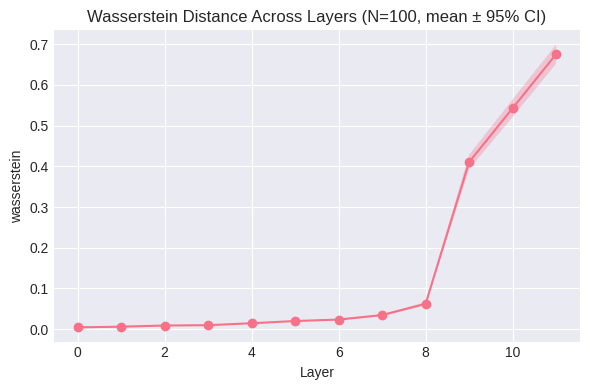

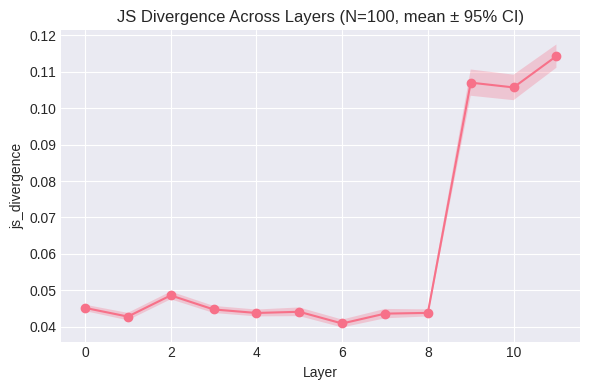

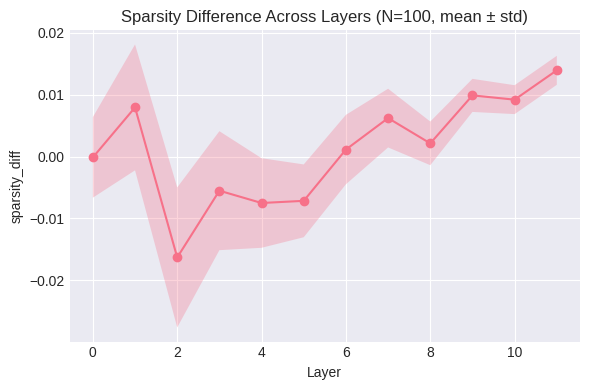

In [57]:
# Wasserstein: mean ± 95% CI
plot_metric_with_ci(
    df_all_examples,
    metric="wasserstein",
    ci_level=0.95,
    use_sem=True,
    title="Wasserstein Distance Across Layers (N=100, mean ± 95% CI)"
)

# JS Divergence: mean ± 95% CI
plot_metric_with_ci(
    df_all_examples,
    metric="js_divergence",
    ci_level=0.95,
    use_sem=True,
    title="JS Divergence Across Layers (N=100, mean ± 95% CI)"
)

# Sparsity Difference: mean ± std 当阴影（如果你更喜欢 std）
plot_metric_with_ci(
    df_all_examples,
    metric="sparsity_diff",
    ci_level=0.95,
    use_sem=False,
    title="Sparsity Difference Across Layers (N=100, mean ± std)"
)


# Stage 2: Token 级归因分析

In [58]:
class TokenAttributionAnalyzer:
    """Token 级归因与忠实度评估（适配 RWKV forward(full_output=True)）"""

    def __init__(self, model, tokenizer):
        self.model = model
        self.tokenizer = tokenizer

    def perturbation_attribution(self, text: str, target_pos: int = -1) -> np.ndarray:
        """
        基于扰动的归因分析：删除每个 token, 观察目标位置同一 target token 的 logit 变化

        Args:
            text: 输入文本
            target_pos: 目标位置 (-1 表示最后一个 token)

        Returns:
            attributions: [seq_len] 每个 token 的重要性分数
        """
        ids = self.tokenizer.encode(text)
        seq_len = len(ids)

        with torch.no_grad():
            # 拿到所有位置的 logits: [T, V]
            logits_full, _ = self.model.forward(ids, None, full_output=True)

            if target_pos == -1:
                target_pos = seq_len - 1

            # 原始目标位置的 logits 向量 [V]
            logits_t = logits_full[target_pos]
            # 以当前模型的 argmax token 作为 target
            target_token_id = int(torch.argmax(logits_t).item())
            original_score = logits_t[target_token_id].item()

        attributions = []

        print(f"计算 {seq_len} 个 token 的归因...")
        for i in tqdm(range(seq_len)):
            # 删除第 i 个 token
            ids_masked = ids[:i] + ids[i+1:]

            if len(ids_masked) == 0:
                attributions.append(0.0)
                continue

            with torch.no_grad():
                logits_masked, _ = self.model.forward(ids_masked, None, full_output=True)

                # 如果删除位置在 target 之前，target_pos 左移一位
                new_target_pos = min(
                    target_pos - 1 if i < target_pos else target_pos,
                    len(ids_masked) - 1
                )
                logits_t_masked = logits_masked[new_target_pos]

                # 看同一个 target token 的 logit 降了多少
                masked_score = logits_t_masked[target_token_id].item()

            attribution = original_score - masked_score
            attributions.append(attribution)

        return np.array(attributions)

    def visualize_heatmap(self, text: str, attributions: np.ndarray, save_path=None):
        """可视化 token 归因热图"""
        ids = self.tokenizer.encode(text)
        tokens = [self.tokenizer.decode([id]) for id in ids]

        max_tokens = 50
        if len(tokens) > max_tokens:
            tokens = tokens[:max_tokens]
            attributions = attributions[:max_tokens]
            print(f"⚠ 文本过长, 只显示前 {max_tokens} 个 token")

        # 归一化
        if attributions.max() - attributions.min() < 1e-12:
            attrs_norm = np.zeros_like(attributions)
        else:
            attrs_norm = (attributions - attributions.min()) / (attributions.max() - attributions.min() + 1e-8)

        fig, ax = plt.subplots(figsize=(max(15, len(tokens) * 0.4), 3))
        im = ax.imshow([attrs_norm], cmap='Reds', aspect='auto', vmin=0, vmax=1)

        ax.set_xticks(range(len(tokens)))
        ax.set_xticklabels(tokens, rotation=45, ha='right', fontsize=10)
        ax.set_yticks([])
        ax.set_title('Token Attribution Heatmap', fontsize=16, fontweight='bold', pad=20)

        cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.15, shrink=0.8)
        cbar.set_label('Importance Score', fontsize=12, fontweight='bold')

        plt.tight_layout()
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"✓ 热图已保存: {save_path}")
        plt.show()

        # Top-k
        top_k = min(5, len(tokens))
        top_indices = np.argsort(attributions)[-top_k:][::-1]
        print(f"\nTop-{top_k} 重要 Token:")
        for rank, idx in enumerate(top_indices, 1):
            print(f"  {rank}. '{tokens[idx]}' (位置 {idx}, 分数: {attributions[idx]:.4f})")

In [59]:
def compute_deletion_curve(model, tokenizer, text: str, attributions: np.ndarray, steps: int = 10):
    """按归因从高到低删除 token, 观察目标 token logit 的变化"""

    ids = tokenizer.encode(text)
    seq_len = len(ids)
    sorted_indices = np.argsort(attributions)[::-1]  # 从高到低

    # 先确定“原始 target token”
    with torch.no_grad():
        logits_full, _ = model.forward(ids, None, full_output=True)
        logits_last = logits_full[-1]              # 最后位置
        target_token_id = int(torch.argmax(logits_last).item())
        base_score = logits_last[target_token_id].item()

    scores = []

    for step in tqdm(range(steps + 1)):
        num_to_remove = int((step / steps) * seq_len)

        if num_to_remove == 0:
            ids_current = ids
        else:
            indices_to_keep = sorted(set(range(seq_len)) - set(sorted_indices[:num_to_remove]))
            ids_current = [ids[i] for i in indices_to_keep]

        if len(ids_current) == 0:
            scores.append(0.0)
            continue

        with torch.no_grad():
            logits, _ = model.forward(ids_current, None, full_output=True)
            logits_last = logits[-1]
            score = logits_last[target_token_id].item()
            scores.append(score)

    # 计算相对 AUC（归一化到 [0,1]）
    xs = np.linspace(0.0, 1.0, steps + 1)
    auc_raw = np.trapz(scores, x=xs)
    auc = auc_raw / (base_score if base_score != 0 else 1.0)

    plt.figure(figsize=(8, 5))
    plt.plot(xs, scores, 'o-', linewidth=2.5, markersize=8)
    plt.xlabel('Deletion ratio', fontsize=13)
    plt.ylabel('Target logit', fontsize=13)
    plt.title(f'Deletion Curve (Norm AUC: {auc:.4f})', fontsize=15)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print(f"✓ Deletion AUC: {auc:.4f}")
    print("  解读: AUC 越低,说明删除高归因 token 后目标 token logit 下降越多, 归因越忠实")

    return scores, auc

In [60]:
# 1) 构建归因分析器
tok_analyzer = TokenAttributionAnalyzer(model, tokenizer)

# 2) 选一个文本（比如长文本前 500 字符）
sample_text = long_texts[0][:500]

# 3) 计算归因
attrs = tok_analyzer.perturbation_attribution(sample_text, target_pos=-1)

# 4) 画热图
tok_analyzer.visualize_heatmap(sample_text, attrs, save_path="token_heatmap.png")

# 5) 计算 deletion curve
scores, auc = compute_deletion_curve(model, tokenizer, sample_text, attrs, steps=10)


NameError: name 'long_texts' is not defined